In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")



from tensorflow.keras.optimizers import Adam

# XOR 문제를 딥러닝으로?

In [2]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )   # 4x2

y_data = np.array( [[0],         # 3x1 
                    [1],
                    [1],
                    [0] ] )

In [3]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [4]:

initX = tf.initializers.GlorotUniform()

w = tf.Variable(initX(shape=[2,1]))   # 2행 1열 
b = tf.Variable(initX(shape=[1]))

def compute_loss():
    z = tf.matmul(x,w) + b
    cost_i =tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels =y )
    cost = tf.reduce_mean(cost_i)
    return cost

optimizer = Adam(learning_rate=0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])
    print(i, compute_loss().numpy())


0 1.1252229
1 1.0505447
2 0.98070157
3 0.9166082
4 0.8592459
5 0.80959445
6 0.76852393
7 0.7366477
8 0.71415573
9 0.7006736
10 0.69520277
11 0.6961875
12 0.70170856
13 0.7097523
14 0.7184743
15 0.72639084
16 0.73247063
17 0.73613787
18 0.7372172
19 0.7358512
20 0.7324126
21 0.7274209
22 0.7214704
23 0.71516603
24 0.7090693
25 0.70365274
26 0.69926506
27 0.6961086
28 0.6942333
29 0.693547
30 0.6938422
31 0.69483465
32 0.6962079
33 0.6976564
34 0.69892156
35 0.699816
36 0.70023507
37 0.7001559
38 0.6996269
39 0.69875014
40 0.6976592
41 0.69649816
42 0.6954005
43 0.6944735
44 0.69378734
45 0.69337106
46 0.6932142
47 0.6932739
48 0.69348574
49 0.6937758
50 0.6940725
51 0.69431674
52 0.69446814
53 0.694508
54 0.6944385
55 0.69427884
56 0.6940596
57 0.6938165
58 0.69358367
59 0.6933888
60 0.6932498
61 0.6931732
62 0.6931553
63 0.6931839
64 0.69324183
65 0.6933104
66 0.6933727
67 0.6934162
68 0.69343376
69 0.6934242
70 0.69339156
71 0.6933431
72 0.6932881
73 0.69323534
74 0.6931921
75 0.69316

612 0.6931472
613 0.6931472
614 0.6931472
615 0.6931472
616 0.6931472
617 0.6931472
618 0.6931472
619 0.6931472
620 0.6931472
621 0.6931472
622 0.6931472
623 0.6931472
624 0.6931472
625 0.6931472
626 0.6931472
627 0.6931472
628 0.6931472
629 0.6931472
630 0.6931472
631 0.6931472
632 0.6931472
633 0.6931472
634 0.6931472
635 0.6931472
636 0.6931472
637 0.6931472
638 0.6931472
639 0.6931472
640 0.6931472
641 0.6931472
642 0.6931472
643 0.6931472
644 0.6931472
645 0.6931472
646 0.6931472
647 0.6931472
648 0.6931472
649 0.6931472
650 0.6931472
651 0.6931472
652 0.6931472
653 0.6931472
654 0.6931472
655 0.6931472
656 0.6931472
657 0.6931472
658 0.6931472
659 0.6931472
660 0.6931472
661 0.6931472
662 0.6931472
663 0.6931472
664 0.6931472
665 0.6931472
666 0.6931472
667 0.6931472
668 0.6931472
669 0.6931472
670 0.6931472
671 0.6931472
672 0.6931472
673 0.6931472
674 0.6931472
675 0.6931472
676 0.6931472
677 0.6931472
678 0.6931472
679 0.6931472
680 0.6931472
681 0.6931472
682 0.6931472
683 0.

In [5]:
def hxfn( xdata ):
    xd = tf.constant( xdata, tf.float32)
    z = tf.matmul( xd, w) + b
    hx = tf.nn.sigmoid( z )
    return (hx.numpy()>0.5) + 0
hxfn(x_data)  

array([[0],
       [0],
       [0],
       [0]])

## w와 b 하나로는 예측 못함.

## -> w와 b를 추가

In [6]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )

y_data = np.array( [[0],
                    [1],
                    [1],
                    [0] ] )
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)

In [7]:
# (4x2) (2x2) (2x1)

initX = tf.initializers.GlorotUniform()
w1 = tf.Variable( initX( shape=[2,2] ) )
b1 = tf.Variable( initX( shape=[2] ) )

w2 = tf.Variable( initX( shape=[2,1] ) )
b2 = tf.Variable( initX( shape=[1] ) )


# 딥하게 하려면\
'''
w1 = tf.Variable( initX( shape=[2,100] ) )
b1 = tf.Variable( initX( shape=[100] ) )

w2 = tf.Variable( initX( shape=[100,1] ) )
b2 = tf.Variable( initX( shape=[1] ) )
'''
def compute_loss():
    z1 = tf.matmul(x,w1) + b1  # x 와 w1 matmul  4행2열 X 2행 2열 => 4행 2열 
    hx1 = tf.nn.sigmoid( z1 )  # z1을 sigmoid 함수에 넣음
    
    z = tf.matmul( hx1, w2  ) + b2  # 
    
    cost_i =tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels =y )
    cost = tf.reduce_mean(cost_i)
    return cost

In [8]:
optimizer = Adam(learning_rate=0.1)
for i in range(2000):
    optimizer.minimize(compute_loss, var_list=[w1,w2,b1,b2])
    print(i, compute_loss().numpy())

0 0.8814205
1 0.8118853
2 0.76020294
3 0.72519755
4 0.70427
5 0.6941601
6 0.69164443
7 0.6938908
8 0.69856626
9 0.7038579
10 0.7084771
11 0.7116446
12 0.713037
13 0.71268827
14 0.71087074
15 0.70798224
16 0.7044549
17 0.7006906
18 0.697021
19 0.69368887
20 0.6908449
21 0.6885563
22 0.68682146
23 0.685586
24 0.6847596
25 0.6842307
26 0.68387866
27 0.68358487
28 0.6832403
29 0.6827518
30 0.6820456
31 0.6810684
32 0.67978686
33 0.6781847
34 0.67625916
35 0.67401654
36 0.67146766
37 0.66862357
38 0.66549224
39 0.6620761
40 0.6583709
41 0.65436566
42 0.6500443
43 0.64538777
44 0.6403767
45 0.63499504
46 0.629233
47 0.62308985
48 0.6165754
49 0.60971147
50 0.6025307
51 0.5950756
52 0.5873953
53 0.5795422
54 0.5715679
55 0.563519
56 0.5554342
57 0.54734385
58 0.53927064
59 0.53123367
60 0.5232523
61 0.51535046
62 0.5075582
63 0.49991134
64 0.49244803
65 0.48520482
66 0.47821265
67 0.4714942
68 0.46506283
69 0.45892352
70 0.45307443
71 0.44750965
72 0.4422209
73 0.43719953
74 0.43243766
75 0.4

575 0.3475904
576 0.34758753
577 0.34758466
578 0.34758186
579 0.34757903
580 0.34757623
581 0.34757346
582 0.3475707
583 0.34756792
584 0.34756517
585 0.34756243
586 0.34755972
587 0.347557
588 0.3475543
589 0.34755164
590 0.34754896
591 0.34754625
592 0.3475436
593 0.34754097
594 0.34753835
595 0.34753573
596 0.3475331
597 0.3475305
598 0.34752792
599 0.34752536
600 0.3475228
601 0.34752023
602 0.34751767
603 0.3475152
604 0.34751263
605 0.3475101
606 0.34750763
607 0.34750512
608 0.34750268
609 0.3475002
610 0.34749776
611 0.34749532
612 0.34749287
613 0.34749043
614 0.34748805
615 0.34748563
616 0.34748322
617 0.34748083
618 0.34747845
619 0.3474761
620 0.34747374
621 0.3474714
622 0.34746903
623 0.3474667
624 0.34746438
625 0.3474621
626 0.3474598
627 0.3474575
628 0.3474552
629 0.34745297
630 0.34745067
631 0.34744847
632 0.3474462
633 0.347444
634 0.34744173
635 0.34743953
636 0.34743732
637 0.34743512
638 0.3474329
639 0.34743077
640 0.3474286
641 0.3474264
642 0.34742427
643 0

1127 0.34690827
1128 0.34690776
1129 0.34690726
1130 0.34690672
1131 0.34690624
1132 0.34690574
1133 0.34690523
1134 0.34690475
1135 0.34690425
1136 0.34690374
1137 0.34690326
1138 0.3469028
1139 0.34690225
1140 0.34690177
1141 0.34690127
1142 0.3469008
1143 0.34690028
1144 0.3468998
1145 0.34689933
1146 0.34689885
1147 0.34689838
1148 0.3468979
1149 0.3468974
1150 0.3468969
1151 0.3468964
1152 0.34689593
1153 0.34689546
1154 0.34689498
1155 0.3468945
1156 0.34689403
1157 0.34689358
1158 0.3468931
1159 0.3468926
1160 0.34689212
1161 0.3468917
1162 0.34689122
1163 0.34689075
1164 0.34689027
1165 0.3468898
1166 0.34688932
1167 0.3468889
1168 0.34688842
1169 0.34688795
1170 0.3468875
1171 0.34688702
1172 0.34688655
1173 0.3468861
1174 0.34688568
1175 0.3468852
1176 0.34688476
1177 0.3468843
1178 0.34688383
1179 0.34688342
1180 0.34688294
1181 0.3468825
1182 0.34688205
1183 0.3468816
1184 0.34688115
1185 0.3468807
1186 0.34688026
1187 0.3468798
1188 0.34687936
1189 0.34687892
1190 0.346878

1654 0.34674406
1655 0.34674388
1656 0.3467437
1657 0.34674352
1658 0.34674335
1659 0.34674317
1660 0.346743
1661 0.34674278
1662 0.3467426
1663 0.3467424
1664 0.34674224
1665 0.34674203
1666 0.34674186
1667 0.34674168
1668 0.3467415
1669 0.34674132
1670 0.34674114
1671 0.34674093
1672 0.34674078
1673 0.34674057
1674 0.34674042
1675 0.34674022
1676 0.34674
1677 0.34673983
1678 0.34673968
1679 0.3467395
1680 0.3467393
1681 0.3467391
1682 0.34673896
1683 0.34673876
1684 0.34673858
1685 0.3467384
1686 0.34673822
1687 0.34673807
1688 0.34673786
1689 0.34673768
1690 0.34673753
1691 0.34673735
1692 0.34673718
1693 0.34673697
1694 0.3467368
1695 0.34673664
1696 0.34673646
1697 0.34673628
1698 0.34673613
1699 0.34673595
1700 0.34673578
1701 0.3467356
1702 0.34673542
1703 0.34673524
1704 0.34673506
1705 0.34673488
1706 0.3467347
1707 0.34673452
1708 0.3467344
1709 0.3467342
1710 0.34673405
1711 0.34673387
1712 0.3467337
1713 0.3467335
1714 0.34673333
1715 0.34673315
1716 0.346733
1717 0.3467328

In [9]:
def hxfn( xdata ):
    xd = tf.constant( xdata, tf.float32)
    z1 = tf.matmul( xd, w1) + b1  
    hx1 = tf.nn.sigmoid( z1 )
    z = tf.matmul(hx1,w2)+b2
    hx = tf.nn.sigmoid( z )
    return (hx.numpy()>0.5) + 0
hxfn(x_data)

array([[0],
       [0],
       [1],
       [1]])

## w와 b를 2번 사용하여 문제해결

# keras 사용해서 XOR 해결

In [10]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )

y_data = np.array( [[0],
                    [1],
                    [1],
                    [0] ] )

In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

dense1 = Dense( units=100, input_dim=2 ,activation="sigmoid") # 2x100, b:100
dense2 = Dense( units=1, input_dim=100 ,activation="sigmoid") # 100x1 b: 1
model = Sequential( [dense1, dense2])
model.compile( loss="binary_crossentropy" ,optimizer=Adam(0.1), metrics=['acc'] )
h = model.fit( x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 435ms/step - loss: 0.7124 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.6910 - acc: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.1038 - acc: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.1802 - acc: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.6355 - acc: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.3316 - acc: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.8115 - acc: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.7457 - acc: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.0219 - acc: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.1134 - acc: 0.5000
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 18ms/step - loss: 0.0068 - acc: 1.0000
Epoch 174/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0067 - acc: 1.0000
Epoch 175/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0066 - acc: 1.0000
Epoch 176/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0065 - acc: 1.0000
Epoch 177/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0064 - acc: 1.0000
Epoch 178/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0063 - acc: 1.0000
Epoch 179/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0063 - acc: 1.0000
Epoch 180/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0062 - acc: 1.0000
Epoch 181/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - acc: 1.0000
Epoch 182/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0060 - acc: 1.0000
Epoch 183/1000
1/1 [==============================] - 0s 9ms/st

1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - acc: 1.0000
Epoch 260/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0027 - acc: 1.0000
Epoch 261/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027 - acc: 1.0000
Epoch 262/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027 - acc: 1.0000
Epoch 263/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0027 - acc: 1.0000
Epoch 264/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - acc: 1.0000
Epoch 265/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - acc: 1.0000
Epoch 266/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - acc: 1.0000
Epoch 267/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - acc: 1.0000
Epoch 268/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - acc: 1.0000
Epoch 269/1000
1/1 [==============================] - 0s 12ms/s

1/1 [==============================] - 0s 16ms/step - loss: 0.0010 - acc: 1.0000
Epoch 432/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - acc: 1.0000
Epoch 433/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0010 - acc: 1.0000
Epoch 434/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - acc: 1.0000
Epoch 435/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - acc: 1.0000
Epoch 436/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - acc: 1.0000
Epoch 437/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - acc: 1.0000
Epoch 438/1000
1/1 [==============================] - 0s 8ms/step - loss: 9.9672e-04 - acc: 1.0000
Epoch 439/1000
1/1 [==============================] - 0s 8ms/step - loss: 9.9249e-04 - acc: 1.0000
Epoch 440/1000
1/1 [==============================] - 0s 8ms/step - loss: 9.8829e-04 - acc: 1.0000
Epoch 441/1000
1/1 [==============================

1/1 [==============================] - 0s 0s/step - loss: 5.6582e-04 - acc: 1.0000
Epoch 596/1000
1/1 [==============================] - 0s 6ms/step - loss: 5.6408e-04 - acc: 1.0000
Epoch 597/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.6234e-04 - acc: 1.0000
Epoch 598/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.6061e-04 - acc: 1.0000
Epoch 599/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.5889e-04 - acc: 1.0000
Epoch 600/1000
1/1 [==============================] - 0s 920us/step - loss: 5.5718e-04 - acc: 1.0000
Epoch 601/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.5548e-04 - acc: 1.0000
Epoch 602/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.5378e-04 - acc: 1.0000
Epoch 603/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.5210e-04 - acc: 1.0000
Epoch 604/1000
1/1 [==============================] - 0s 6ms/step - loss: 5.5042e-04 - acc: 1.0000
Epoch 605/1000
1/1 [====

1/1 [==============================] - 0s 8ms/step - loss: 3.6161e-04 - acc: 1.0000
Epoch 760/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.6073e-04 - acc: 1.0000
Epoch 761/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.5986e-04 - acc: 1.0000
Epoch 762/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5899e-04 - acc: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5812e-04 - acc: 1.0000
Epoch 764/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5726e-04 - acc: 1.0000
Epoch 765/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5639e-04 - acc: 1.0000
Epoch 766/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5554e-04 - acc: 1.0000
Epoch 767/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5468e-04 - acc: 1.0000
Epoch 768/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.5383e-04 - acc: 1.0000
Epoch 769/1000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 2.5176e-04 - acc: 1.0000
Epoch 924/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.5126e-04 - acc: 1.0000
Epoch 925/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5075e-04 - acc: 1.0000
Epoch 926/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5025e-04 - acc: 1.0000
Epoch 927/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4974e-04 - acc: 1.0000
Epoch 928/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4924e-04 - acc: 1.0000
Epoch 929/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4874e-04 - acc: 1.0000
Epoch 930/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4825e-04 - acc: 1.0000
Epoch 931/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4775e-04 - acc: 1.0000
Epoch 932/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.4726e-04 - acc: 1.0000
Epoch 933/1000
1/1 [=

In [12]:
(model.predict(x_data)>0.5)+0

array([[0],
       [1],
       [1],
       [0]])

In [13]:
w,b = dense1.get_weights()  # 2행 100열
w,b

(array([[-2.0609956 ,  1.4590505 , -5.341616  , -5.693997  , -6.2813134 ,
         -5.4137673 , -7.229554  , -5.949813  , -6.6714244 , -1.9357591 ,
          2.7689261 , -6.1374683 ,  2.0822372 , -1.0942783 ,  0.17472577,
         -5.387749  , -3.05519   , -8.2790165 , -2.0577939 , -1.2926784 ,
         -1.0380906 , -1.1401955 , -2.5119526 , -1.3733975 , -6.692928  ,
         -4.248432  , -3.4051414 , -0.9273489 ,  3.6976554 , -1.1812538 ,
         -6.998734  ,  1.1389943 , -3.3340724 , -1.1655561 , -0.8799627 ,
          0.42747632,  1.576455  , -0.92818326, -0.9490967 , -5.1671157 ,
         -1.6326586 , -3.228501  , -1.6790864 , -1.0205791 , -0.48123616,
         -1.2138704 , -0.6439545 , -0.9554189 , -5.707008  ,  1.7797973 ,
          0.66569567, -2.0636795 , -2.332057  , -6.381796  , -4.2694    ,
         -5.8866134 , -6.1072693 , -0.62682545, -6.345005  , -1.6879079 ,
         -5.6673512 , -1.6775128 ,  1.3711543 , -2.339054  , -2.685815  ,
         -1.1829213 , -4.111816  , -0.

In [14]:
w,b = dense2.get_weights()  # 100행 1열
w,b

(array([[ 0.45222184],
        [ 1.080837  ],
        [ 1.2963953 ],
        [ 1.1214257 ],
        [ 1.6008122 ],
        [-1.1980957 ],
        [-1.8171538 ],
        [-1.3244573 ],
        [-1.5628015 ],
        [-0.05657276],
        [ 1.1220089 ],
        [-1.5539578 ],
        [ 1.528259  ],
        [ 0.1358874 ],
        [ 0.8920086 ],
        [-0.92221117],
        [ 0.5743573 ],
        [-2.6939256 ],
        [ 0.27606136],
        [ 0.37484458],
        [ 0.262271  ],
        [ 0.18378502],
        [-0.16986519],
        [ 0.11308988],
        [-1.5187417 ],
        [ 1.0145243 ],
        [-0.37047076],
        [ 0.23843129],
        [-3.3321998 ],
        [ 0.42114687],
        [-1.7728105 ],
        [ 0.62682366],
        [-0.47562966],
        [ 0.27645075],
        [ 0.27005184],
        [ 0.9154219 ],
        [-1.3781118 ],
        [ 0.27585655],
        [ 0.17171001],
        [-0.8736445 ],
        [ 0.0034893 ],
        [ 0.5574862 ],
        [ 0.588453  ],
        [ 0



##  (4x2)  (2x64) (64x32) (32x1)  ->  4x2



In [15]:
modelNN = Sequential()
modelNN.add( Dense( units=64, input_dim=2 ,activation="sigmoid") )
modelNN.add( Dense( units=32, activation="sigmoid") )
modelNN.add( Dense( units=1,  activation="sigmoid") )
modelNN.compile( loss="binary_crossentropy" ,optimizer=Adam(0.1), metrics=['acc'] )
h = modelNN.fit( x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 433ms/step - loss: 0.6987 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.3890 - acc: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.5916 - acc: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.8004 - acc: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7166 - acc: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7594 - acc: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7484 - acc: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7360 - acc: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.7270 - acc: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.7185 - acc: 0.5000
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 16ms/step - loss: 0.0288 - acc: 1.0000
Epoch 174/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0285 - acc: 1.0000
Epoch 175/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0281 - acc: 1.0000
Epoch 176/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0279 - acc: 1.0000
Epoch 177/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0276 - acc: 1.0000
Epoch 178/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0273 - acc: 1.0000
Epoch 179/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0270 - acc: 1.0000
Epoch 180/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0267 - acc: 1.0000
Epoch 181/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0265 - acc: 1.0000
Epoch 182/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0262 - acc: 1.0000
Epoch 183/1000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 0.0142 - acc: 1.0000
Epoch 260/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0141 - acc: 1.0000
Epoch 261/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0140 - acc: 1.0000
Epoch 262/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0139 - acc: 1.0000
Epoch 263/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0138 - acc: 1.0000
Epoch 264/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0138 - acc: 1.0000
Epoch 265/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0137 - acc: 1.0000
Epoch 266/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0136 - acc: 1.0000
Epoch 267/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0135 - acc: 1.0000
Epoch 268/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0134 - acc: 1.0000
Epoch 269/1000
1/1 [==============================] - 0s 8ms/

Epoch 430/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0062 - acc: 1.0000
Epoch 431/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0062 - acc: 1.0000
Epoch 432/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0062 - acc: 1.0000
Epoch 433/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0062 - acc: 1.0000
Epoch 434/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - acc: 1.0000
Epoch 435/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - acc: 1.0000
Epoch 436/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - acc: 1.0000
Epoch 437/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - acc: 1.0000
Epoch 438/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0060 - acc: 1.0000
Epoch 439/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0060 - acc: 1.0000
Epoch 440/1000
1/1 [=============================

Epoch 516/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0046 - acc: 1.0000
Epoch 517/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0046 - acc: 1.0000
Epoch 518/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0046 - acc: 1.0000
Epoch 519/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0046 - acc: 1.0000
Epoch 520/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0046 - acc: 1.0000
Epoch 521/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0046 - acc: 1.0000
Epoch 522/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0046 - acc: 1.0000
Epoch 523/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0045 - acc: 1.0000
Epoch 524/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0045 - acc: 1.0000
Epoch 525/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0045 - acc: 1.0000
Epoch 526/1000
1/1 [========================

1/1 [==============================] - 0s 11ms/step - loss: 0.0029 - acc: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - acc: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0029 - acc: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0029 - acc: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0029 - acc: 1.0000
Epoch 692/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0029 - acc: 1.0000
Epoch 693/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0029 - acc: 1.0000
Epoch 694/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - acc: 1.0000
Epoch 695/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0029 - acc: 1.0000
Epoch 696/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0029 - acc: 1.0000
Epoch 697/1000
1/1 [==============================] - 0s 16m

Epoch 858/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0020 - acc: 1.0000
Epoch 859/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020 - acc: 1.0000
Epoch 860/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - acc: 1.0000
Epoch 861/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - acc: 1.0000
Epoch 862/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - acc: 1.0000
Epoch 863/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - acc: 1.0000
Epoch 864/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - acc: 1.0000
Epoch 865/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - acc: 1.0000
Epoch 866/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0020 - acc: 1.0000
Epoch 867/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020 - acc: 1.0000
Epoch 868/1000
1/1 [===========================

In [16]:
(modelNN.predict(x_data)>0.5)

array([[False],
       [ True],
       [ True],
       [False]])

In [17]:

(modelNN.predict(x_data)>0.5)+0

array([[0],
       [1],
       [1],
       [0]])

### 일반 로지스틱모델 -> XOR예측


In [18]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )

y_data = np.array( [[0],
                    [1],
                    [1],
                    [0] ] )

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [20]:
model_logi = LogisticRegression(max_iter=1000, verbose=1)
model_logi.fit(x_data,y_data)

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, verbose=1)

In [21]:
model_logi.coef_     # 기울기

array([[0., 0.]])

In [22]:
model_logi.intercept_ # 절편

array([0.])

In [23]:
model_logi.predict(x_data) # x데이터 예측 값

array([0, 0, 0, 0])

In [24]:
model_logi.score(x_data, y_data) # 로지스틱모델 정확도

0.5

# 사이킷런에서 지원하는딥러닝  

----

 - from sklearn.linear_model import LogisticRegression
 - from sklearn.neural_network import MLPClassifier


```
hidden_layer_sizes=(100,)
(4x2)  (2x100)   (100x1)
```

In [25]:

model_mlp = MLPClassifier(hidden_layer_sizes=(100,) ,max_iter=1000,verbose=True  )
model_mlp.fit(x_data,y_data)

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.70706452
Iteration 2, loss = 0.70488304
Iteration 3, loss = 0.70282331
Iteration 4, loss = 0.70084922
Iteration 5, loss = 0.69893571
Iteration 6, loss = 0.69711994
Iteration 7, loss = 0.69536382
Iteration 8, loss = 0.69367302
Iteration 9, loss = 0.69208605
Iteration 10, loss = 0.69052167
Iteration 11, loss = 0.68899530
Iteration 12, loss = 0.68749042
Iteration 13, loss = 0.68602110
Iteration 14, loss = 0.68457033
Iteration 15, loss = 0.68314844
Iteration 16, loss = 0.68171728
Iteration 17, loss = 0.68030531
Iteration 18, loss = 0.67893278
Iteration 19, loss = 0.67760070
Iteration 20, loss = 0.67630976
Iteration 21, loss = 0.67499400
Iteration 22, loss = 0.67369721
Iteration 23, loss = 0.67236931
Iteration 24, loss = 0.67104456
Iteration 25, loss = 0.66975705
Iteration 26, loss = 0.66846235
Iteration 27, loss = 0.66716961
Iteration 28, loss = 0.66589388
Iteration 29, loss = 0.66462419
Iteration 30, loss = 0.66337296
Iteration 31, loss = 0.66212447
Iteration 32, los

Iteration 427, loss = 0.12485294
Iteration 428, loss = 0.12415264
Iteration 429, loss = 0.12345719
Iteration 430, loss = 0.12276061
Iteration 431, loss = 0.12207664
Iteration 432, loss = 0.12138931
Iteration 433, loss = 0.12071550
Iteration 434, loss = 0.12004471
Iteration 435, loss = 0.11936410
Iteration 436, loss = 0.11869948
Iteration 437, loss = 0.11804628
Iteration 438, loss = 0.11738540
Iteration 439, loss = 0.11673208
Iteration 440, loss = 0.11609014
Iteration 441, loss = 0.11544376
Iteration 442, loss = 0.11481323
Iteration 443, loss = 0.11418075
Iteration 444, loss = 0.11354746
Iteration 445, loss = 0.11290319
Iteration 446, loss = 0.11227740
Iteration 447, loss = 0.11167546
Iteration 448, loss = 0.11105276
Iteration 449, loss = 0.11042899
Iteration 450, loss = 0.10982946
Iteration 451, loss = 0.10923756
Iteration 452, loss = 0.10863605
Iteration 453, loss = 0.10803319
Iteration 454, loss = 0.10743830
Iteration 455, loss = 0.10684618
Iteration 456, loss = 0.10627463
Iteration 

Iteration 714, loss = 0.03138576
Iteration 715, loss = 0.03126291
Iteration 716, loss = 0.03114117
Iteration 717, loss = 0.03101734
Iteration 718, loss = 0.03089520
Iteration 719, loss = 0.03077550
Iteration 720, loss = 0.03065631
Iteration 721, loss = 0.03053448
Iteration 722, loss = 0.03041566
Iteration 723, loss = 0.03029976
Iteration 724, loss = 0.03018299
Iteration 725, loss = 0.03006397
Iteration 726, loss = 0.02994704
Iteration 727, loss = 0.02983142
Iteration 728, loss = 0.02971619
Iteration 729, loss = 0.02960025
Iteration 730, loss = 0.02948803
Iteration 731, loss = 0.02937793
Iteration 732, loss = 0.02926561
Iteration 733, loss = 0.02914961
Iteration 734, loss = 0.02903833
Iteration 735, loss = 0.02892772
Iteration 736, loss = 0.02881563
Iteration 737, loss = 0.02870701
Iteration 738, loss = 0.02859708
Iteration 739, loss = 0.02848750
Iteration 740, loss = 0.02837864
Iteration 741, loss = 0.02827230
Iteration 742, loss = 0.02816589
Iteration 743, loss = 0.02805703
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

In [26]:
model_mlp.predict(x_data)

array([0, 1, 1, 0])

In [27]:
model_mlp.coefs_  


# 4 x 2  matmul  2 x 100 => 4 x 100 
# 4 x 100 matmul 100 x 1 => 4 x 1    


[array([[ 5.96212364e-01, -8.57027332e-03, -1.10742524e-02,
         -9.53560439e-20,  1.57789823e-01, -1.46482025e-11,
          2.07244219e-01,  2.24314557e-19, -3.20636027e-19,
          2.60751892e-01,  1.86781191e-01,  4.37874884e-01,
         -4.48534387e-01,  5.93551414e-17, -3.97042481e-02,
         -3.80383479e-06,  7.36949064e-02,  2.05905231e-01,
         -2.62541256e-08,  6.17480360e-01, -5.75066245e-01,
         -4.58836368e-01,  3.47828394e-12, -6.33579811e-01,
         -5.37672331e-01,  5.19078704e-01, -4.60115155e-02,
         -8.28588860e-11, -6.64470903e-01,  5.25150978e-01,
         -8.06988760e-18,  7.19553000e-21, -6.76317680e-01,
          6.41736776e-01, -3.51457176e-01, -1.28903562e-01,
          1.40680569e-01,  1.35547449e-01,  1.43150879e-01,
         -4.88410116e-01, -3.80454387e-20, -4.61336771e-07,
          4.37457449e-02,  2.05676246e-01, -2.81985182e-05,
         -4.34229959e-01, -3.48290423e-01, -5.08229456e-01,
         -1.04999538e-01,  1.40279709e-0

In [28]:
model_mlp.coefs_[0].shape , model_mlp.coefs_[1].shape #  기울기

((2, 100), (100, 1))

```
hidden_layer_sizes=(100,50)
(4x2)  (2x100) (100x50)  (50x1)
```

In [29]:
model_mlp2 = MLPClassifier(hidden_layer_sizes=(100,50) ,max_iter=1000,verbose=True  )
model_mlp2.fit(x_data,y_data)

Iteration 1, loss = 0.70827851
Iteration 2, loss = 0.70136881
Iteration 3, loss = 0.69514184
Iteration 4, loss = 0.68950735
Iteration 5, loss = 0.68429554
Iteration 6, loss = 0.67924490
Iteration 7, loss = 0.67451015
Iteration 8, loss = 0.67010783
Iteration 9, loss = 0.66597742
Iteration 10, loss = 0.66209779
Iteration 11, loss = 0.65803353
Iteration 12, loss = 0.65399473
Iteration 13, loss = 0.64994227
Iteration 14, loss = 0.64580843
Iteration 15, loss = 0.64161729
Iteration 16, loss = 0.63798918
Iteration 17, loss = 0.63459319
Iteration 18, loss = 0.63107457
Iteration 19, loss = 0.62772894
Iteration 20, loss = 0.62419325
Iteration 21, loss = 0.62051765
Iteration 22, loss = 0.61673328
Iteration 23, loss = 0.61293539
Iteration 24, loss = 0.60891532
Iteration 25, loss = 0.60471700
Iteration 26, loss = 0.60060792
Iteration 27, loss = 0.59657022
Iteration 28, loss = 0.59255269
Iteration 29, loss = 0.58838023
Iteration 30, loss = 0.58394453
Iteration 31, loss = 0.57957969
Iteration 32, los

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 36, loss = 0.55734416
Iteration 37, loss = 0.55262630
Iteration 38, loss = 0.54808654
Iteration 39, loss = 0.54342033
Iteration 40, loss = 0.53861668
Iteration 41, loss = 0.53351658
Iteration 42, loss = 0.52840376
Iteration 43, loss = 0.52323430
Iteration 44, loss = 0.51807471
Iteration 45, loss = 0.51290545
Iteration 46, loss = 0.50773977
Iteration 47, loss = 0.50241455
Iteration 48, loss = 0.49693244
Iteration 49, loss = 0.49137745
Iteration 50, loss = 0.48576160
Iteration 51, loss = 0.48017296
Iteration 52, loss = 0.47479379
Iteration 53, loss = 0.46917045
Iteration 54, loss = 0.46333727
Iteration 55, loss = 0.45747005
Iteration 56, loss = 0.45154928
Iteration 57, loss = 0.44548795
Iteration 58, loss = 0.43934889
Iteration 59, loss = 0.43335073
Iteration 60, loss = 0.42713655
Iteration 61, loss = 0.42071822
Iteration 62, loss = 0.41447279
Iteration 63, loss = 0.40828012
Iteration 64, loss = 0.40205077
Iteration 65, loss = 0.39586905
Iteration 66, loss = 0.38957455
Iteratio

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, verbose=True)

In [30]:
len(model_mlp2.coefs_)

3

In [31]:
# 1번째, 2번째, 3번째 행렬 모양
model_mlp2.coefs_[0].shape,model_mlp2.coefs_[1].shape,model_mlp2.coefs_[2].shape

((2, 100), (100, 50), (50, 1))

```
hidden_layer_sizes=(100,50,20)
(4x2)  (2x100)   (100x50) (50x20)  (20x1)
```

In [32]:
model_mlp3 = MLPClassifier(hidden_layer_sizes=(100,50,20) ,max_iter=1000,verbose=True  )
model_mlp3.fit(x_data,y_data)

Iteration 1, loss = 0.72596020
Iteration 2, loss = 0.71826712
Iteration 3, loss = 0.71213454
Iteration 4, loss = 0.70697861
Iteration 5, loss = 0.70198908
Iteration 6, loss = 0.69710383
Iteration 7, loss = 0.69235509
Iteration 8, loss = 0.68780137
Iteration 9, loss = 0.68368901
Iteration 10, loss = 0.67973536
Iteration 11, loss = 0.67567960
Iteration 12, loss = 0.67149589
Iteration 13, loss = 0.66750840
Iteration 14, loss = 0.66423752
Iteration 15, loss = 0.66113826
Iteration 16, loss = 0.65757421
Iteration 17, loss = 0.65381057
Iteration 18, loss = 0.65003341
Iteration 19, loss = 0.64600502
Iteration 20, loss = 0.64220006
Iteration 21, loss = 0.63817537
Iteration 22, loss = 0.63387043
Iteration 23, loss = 0.62971006
Iteration 24, loss = 0.62543612
Iteration 25, loss = 0.62175394
Iteration 26, loss = 0.61799878
Iteration 27, loss = 0.61365808
Iteration 28, loss = 0.60924465
Iteration 29, loss = 0.60493667
Iteration 30, loss = 0.60025886
Iteration 31, loss = 0.59537008
Iteration 32, los

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 53, loss = 0.46483285
Iteration 54, loss = 0.45742649
Iteration 55, loss = 0.44973384
Iteration 56, loss = 0.44163762
Iteration 57, loss = 0.43401228
Iteration 58, loss = 0.42618476
Iteration 59, loss = 0.41756727
Iteration 60, loss = 0.40973244
Iteration 61, loss = 0.40148614
Iteration 62, loss = 0.39319207
Iteration 63, loss = 0.38467767
Iteration 64, loss = 0.37623509
Iteration 65, loss = 0.36791647
Iteration 66, loss = 0.35934367
Iteration 67, loss = 0.35061138
Iteration 68, loss = 0.34172757
Iteration 69, loss = 0.33289086
Iteration 70, loss = 0.32396910
Iteration 71, loss = 0.31488624
Iteration 72, loss = 0.30585427
Iteration 73, loss = 0.29687924
Iteration 74, loss = 0.28803382
Iteration 75, loss = 0.27916596
Iteration 76, loss = 0.27024776
Iteration 77, loss = 0.26146483
Iteration 78, loss = 0.25291311
Iteration 79, loss = 0.24444290
Iteration 80, loss = 0.23591377
Iteration 81, loss = 0.22756453
Iteration 82, loss = 0.21934413
Iteration 83, loss = 0.21138846
Iteratio

MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, verbose=True)

In [33]:
model_mlp3.coefs_[0].shape,model_mlp3.coefs_[1].shape,model_mlp3.coefs_[2].shape,model_mlp3.coefs_[3].shape

((2, 100), (100, 50), (50, 20), (20, 1))

In [34]:
model_mlp3.predict(x_data)
# 사이킷런의 mlp사용하여 xor문제 해결

array([0, 1, 1, 0])

# 27일 퀴즈 

# 1.breast_cancer

```
breast_cancer 데이터셋을 이용하여 딥러닝으로
처리하시요(sklearn, 케라스버전)
1) train, test 분리
2) test 1번째 행 암 여부 예측
3)train, test 정확도 구하기
```

## 데이터 로드

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [36]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## x,y데이터 분리 및 스케일링

In [37]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]


from sklearn.preprocessing import MinMaxScaler
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)


x = tf.constant(x_dataN, tf.float32)
y = tf.constant(y_data, tf.float32)

## 1.사이킷런(MLP)

### train,test분리

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_dataN,y_data,test_size=0.2, stratify=y_data)

In [39]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [40]:
model_mlp = MLPClassifier(hidden_layer_sizes=(100,) ,max_iter=1000,verbose=True  )
model_mlp.fit(x_train,y_train)

Iteration 1, loss = 0.72620840
Iteration 2, loss = 0.70361502
Iteration 3, loss = 0.68298369
Iteration 4, loss = 0.66258374
Iteration 5, loss = 0.64305466
Iteration 6, loss = 0.62415288
Iteration 7, loss = 0.60652445
Iteration 8, loss = 0.58976714
Iteration 9, loss = 0.57392952
Iteration 10, loss = 0.55907272
Iteration 11, loss = 0.54448929
Iteration 12, loss = 0.53104282
Iteration 13, loss = 0.51770782
Iteration 14, loss = 0.50457711
Iteration 15, loss = 0.49193125
Iteration 16, loss = 0.47944859
Iteration 17, loss = 0.46723039
Iteration 18, loss = 0.45532010
Iteration 19, loss = 0.44355361
Iteration 20, loss = 0.43211203
Iteration 21, loss = 0.42107897
Iteration 22, loss = 0.41026663
Iteration 23, loss = 0.39988148
Iteration 24, loss = 0.38920749
Iteration 25, loss = 0.37958536
Iteration 26, loss = 0.37015074
Iteration 27, loss = 0.36080493
Iteration 28, loss = 0.35203681
Iteration 29, loss = 0.34356251
Iteration 30, loss = 0.33553238
Iteration 31, loss = 0.32791778
Iteration 32, los

Iteration 273, loss = 0.04422210
Iteration 274, loss = 0.04402411
Iteration 275, loss = 0.04379584
Iteration 276, loss = 0.04373728
Iteration 277, loss = 0.04375338
Iteration 278, loss = 0.04357175
Iteration 279, loss = 0.04319841
Iteration 280, loss = 0.04334003
Iteration 281, loss = 0.04382680
Iteration 282, loss = 0.04346625
Iteration 283, loss = 0.04302272
Iteration 284, loss = 0.04260853
Iteration 285, loss = 0.04263767
Iteration 286, loss = 0.04242786
Iteration 287, loss = 0.04219838
Iteration 288, loss = 0.04207052
Iteration 289, loss = 0.04182637
Iteration 290, loss = 0.04256138
Iteration 291, loss = 0.04190942
Iteration 292, loss = 0.04153907
Iteration 293, loss = 0.04153911
Iteration 294, loss = 0.04121074
Iteration 295, loss = 0.04180335
Iteration 296, loss = 0.04118204
Iteration 297, loss = 0.04081743
Iteration 298, loss = 0.04112743
Iteration 299, loss = 0.04111139
Iteration 300, loss = 0.04043650
Iteration 301, loss = 0.04091671
Iteration 302, loss = 0.04060657
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

###  첫째 행 암 여부 예측

In [41]:
scaleF.transform([x_test[0]])

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-3.16916601e-01, -3.15713023e-01, -3.00708451e-01,
        -6.08019306e-02,  4.48575442e+00,  4.72219264e-01,
         1.72158009e-01,  6.53385848e-01,  3.23977145e+00,
         3.78729908e+00,  1.03955185e-04, -3.26286507e-02,
        -3.09709677e-02, -1.26069644e-02,  6.07101016e+00,
         5.00223131e-01,  1.24285787e-01,  4.13738545e+00,
         4.17130423e+00,  7.30821025e-01, -2.74221654e-01,
        -3.11774303e-01, -2.50056004e-01, -4.54910414e-02,
         2.08244880e+00,  5.18484912e-02,  5.17510641e-02,
         7.43496180e-01,  3.25263182e-01,  3.95198572e-02]])

In [42]:
model_mlp.predict(scaleF.transform([x_test[0]]))
# 1로 예측  

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1])

### train test 정확도

In [43]:
model_mlp.score(x_train,y_train)

0.9934065934065934

In [44]:
model_mlp.score(x_test,y_test)

0.956140350877193

## keras

In [45]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]


from sklearn.preprocessing import MinMaxScaler
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)


x = tf.constant(x_dataN, tf.float32)
y = tf.constant(y_data, tf.float32)

x_train,x_test, y_train,y_test = train_test_split(x_dataN,y_data,test_size=0.2, stratify=y_data)

In [46]:
x_data.shape, y_data.shape

((569, 30), (569,))

```
(569,30)(30,64) (64,32) (32,1)

```

In [47]:
modelNN = Sequential()
modelNN.add( Dense( units=64, activation='relu' ) )
modelNN.add( Dense( units=32, activation='relu' ) )
modelNN.add( Dense( units=1, activation='sigmoid' ) )
modelNN.compile( loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
                                                                         
modelNN.fit( x_train, y_train, epochs = 10)                    

Epoch 1/10
15/15 [==============================] - 1s 9ms/step - loss: 0.6690 - acc: 0.7473
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.6025 - acc: 0.8440
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 0.5271 - acc: 0.8703
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.4369 - acc: 0.8879
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.3581 - acc: 0.8879
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.2936 - acc: 0.9099
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.2483 - acc: 0.9165
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 0.2176 - acc: 0.9209
Epoch 9/10
15/15 [==============================] - 0s 8ms/step - loss: 0.1991 - acc: 0.9341
Epoch 10/10
15/15 [==============================] - 0s 7ms/step - loss: 0.1771 - acc: 0.9385


### 첫행 예측

In [48]:
modelNN.predict(scaleF.transform([x_test[0]]))

C:\Users\TFG5076XG\anaconda3\envs\pdh\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[1.]], dtype=float32)

### train, test정확도


In [49]:
modelNN.evaluate(x_train,y_train)

15/15 [==============================] - 0s 5ms/step - loss: 0.1690 - acc: 0.9385


[0.16895543038845062, 0.9384615421295166]

In [50]:
modelNN.evaluate(x_test,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.1609 - acc: 0.9211


[0.1608828604221344, 0.9210526347160339]

# 퀴즈2 fashion

```
fashion_mnist 데이터셋을 이용하여 딥러닝으로 처리하시요
(sklearn, 케라스버전)
1) test 1번째 이미지 예측
2) train, test 정확도 구하기
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot
```

## MLP

In [51]:
from tensorflow.keras.datasets.fashion_mnist import load_data
mnist = load_data()
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 훈련 검증

In [52]:
(x_train, y_train), (x_test, y_test) = mnist

In [53]:
x_train.shape,x_test.shape,y_test.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

### 모델링

  hidden layer 사이즈 100

In [54]:
model_mlp = MLPClassifier( hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
model_mlp.fit( x_train.reshape(60000, 28*28), y_train )

Iteration 1, loss = 4.97750067
Iteration 2, loss = 1.10012369
Iteration 3, loss = 0.82054541
Iteration 4, loss = 0.70394922
Iteration 5, loss = 0.63490220
Iteration 6, loss = 0.58233839
Iteration 7, loss = 0.52523594
Iteration 8, loss = 0.48290204
Iteration 9, loss = 0.45532646
Iteration 10, loss = 0.44421988
Iteration 11, loss = 0.43528920
Iteration 12, loss = 0.42512711
Iteration 13, loss = 0.41013037
Iteration 14, loss = 0.40447257
Iteration 15, loss = 0.39493434
Iteration 16, loss = 0.39639390
Iteration 17, loss = 0.38204242
Iteration 18, loss = 0.37316888
Iteration 19, loss = 0.37105873
Iteration 20, loss = 0.36952187
Iteration 21, loss = 0.36845537
Iteration 22, loss = 0.36371342
Iteration 23, loss = 0.35624202
Iteration 24, loss = 0.35021447
Iteration 25, loss = 0.35031681
Iteration 26, loss = 0.34557305
Iteration 27, loss = 0.34149613
Iteration 28, loss = 0.34253147
Iteration 29, loss = 0.34370490
Iteration 30, loss = 0.33704608
Iteration 31, loss = 0.33708251
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

### test1 이미지

In [55]:
model_mlp.predict(x_test[0].reshape(1, -1))

# 9 - > 부츠

array([9], dtype=uint8)

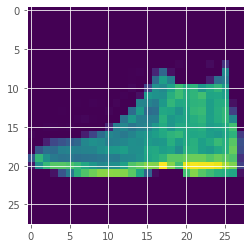

In [56]:
plt.imshow(x_test[0])   # [면, 행, 열]
plt.show()

### 훈련, 테스트 정확도

In [57]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [58]:
model_mlp.score(x_train.reshape(60000,28*28),y_train)

0.9009666666666667

In [59]:
model_mlp.score(x_test.reshape(-1,28*28),y_test)

0.8481

## 케라스

In [60]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=10,  activation='softmax' )  )

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7531 - acc: 0.5399
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8574 - acc: 0.6765
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7091 - acc: 0.7151
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6350 - acc: 0.7397
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5905 - acc: 0.7527
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5662 - acc: 0.7741
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5183 - acc: 0.8057
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5008 - acc: 0.8163
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4651 - acc: 0.8380
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4490 - acc: 0.8446


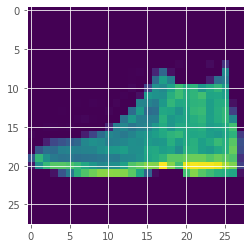

In [61]:
plt.imshow(x_test[0])   # [면, 행, 열]
plt.show()

In [62]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

# 9  -> 부츠

array([9], dtype=int64)

### 훈련 테스트 정확도

In [63]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4262 - acc: 0.8542


[0.42622554302215576, 0.8541833162307739]

In [64]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5040 - acc: 0.8326


[0.5039544701576233, 0.8325999975204468]

# MLP 에서 y는 원핫인코딩안해도돼, 케라스에서는 flatten, sparse 쓰면 인코딩안해도댐
